In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data=pd.read_csv("World_University_Rankings_2023.csv")

In [6]:
data

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6


In [7]:
data.columns

Index(['University Rank', 'Name of University', 'Location', 'No of student',
       'No of student per staff', 'International Student', 'Female:Male Ratio',
       'OverAll Score', 'Teaching Score', 'Research Score', 'Citations Score',
       'Industry Income Score', 'International Outlook Score'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2341 non-null   object 
 1   Name of University           2233 non-null   object 
 2   Location                     2047 non-null   object 
 3   No of student                2209 non-null   object 
 4   No of student per staff      2208 non-null   float64
 5   International Student        2209 non-null   object 
 6   Female:Male Ratio            2128 non-null   object 
 7   OverAll Score                1799 non-null   object 
 8   Teaching Score               1799 non-null   float64
 9   Research Score               1799 non-null   float64
 10  Citations Score              1799 non-null   float64
 11  Industry Income Score        1799 non-null   float64
 12  International Outlook Score  1799 non-null   float64
dtypes: float64(6), obj

In [9]:
data.describe()

,No of student per staff,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
count,2208.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,19.000408,27.018010,23.016898,48.495887,47.104558,46.880378
std,12.132224,13.282243,16.763819,27.967185,15.093682,22.582401
min,0.400000,11.600000,7.400000,0.800000,36.900000,14.100000
25%,12.600000,18.000000,11.300000,23.100000,37.800000,27.900000
50%,16.600000,22.700000,17.000000,47.200000,40.500000,42.100000
75%,22.200000,31.850000,28.900000,72.350000,48.300000,62.100000
max,232.200000,94.800000,99.700000,100.000000,100.000000,99.700000


1. Очистка данных

In [10]:
null_check = data.isna().sum().sort_values(ascending = False)
null_check

OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
Location                       294
Female:Male Ratio              213
No of student per staff        133
No of student                  132
International Student          132
Name of University             108
University Rank                  0
dtype: int64

In [11]:
missing_percentages = data.isna().sum().sort_values(ascending = False) / len(data)
missing_percentages

OverAll Score                  0.231525
Teaching Score                 0.231525
Research Score                 0.231525
Citations Score                0.231525
Industry Income Score          0.231525
International Outlook Score    0.231525
Location                       0.125587
Female:Male Ratio              0.090987
No of student per staff        0.056813
No of student                  0.056386
International Student          0.056386
Name of University             0.046134
University Rank                0.000000
dtype: float64

In [12]:
data["No of student"] = data["No of student"].astype(str).str.replace(",", "").astype(float)
data["No of student"] = data["No of student"].fillna(data["No of student"].mean()) 

data["Female:Male Ratio"] = data["Female:Male Ratio"].str.extract(r'(\d+)\s?:')[0].astype("float")
data["Female:Male Ratio"] = data["Female:Male Ratio"].fillna(data["Female:Male Ratio"].mean()) 

data["International Student"] = data["International Student"].fillna(0)

data['Name of University'] = data['Name of University'].fillna("Unknown")

data['Location'] = data['Location'].fillna("Unknown")

data['OverAll Score'] = data['OverAll Score'].fillna("Unknown")

data['Teaching Score'] = data['Teaching Score'].fillna(data['Teaching Score'].mean()) 

data['Research Score'] = data['Research Score'].fillna(data['Research Score'].mean()) 

data['Citations Score'] = data['Citations Score'].fillna(data['Citations Score'].mean()) 

data['International Outlook Score'] = data['International Outlook Score'].fillna(data['International Outlook Score'].mean()) 

data['No of student per staff'] = data['No of student per staff'].fillna(data['No of student per staff'].mean()) 

data['Industry Income Score']=data['Industry Income Score'].fillna(data['Industry Income Score'].mean())


In [13]:
data.isna().sum()

University Rank                0
Name of University             0
Location                       0
No of student                  0
No of student per staff        0
International Student          0
Female:Male Ratio              0
OverAll Score                  0
Teaching Score                 0
Research Score                 0
Citations Score                0
Industry Income Score          0
International Outlook Score    0
dtype: int64

In [14]:
print("Duplicates count: " + str(data.duplicated().sum()))

Duplicates count: 29


In [15]:
cleaned = data.drop_duplicates()
print("Duplicates count: " + str(cleaned.duplicated().sum()))

Duplicates count: 0


2. Анализ данных с визуализацией

In [19]:
print("Average number of students in all unis: " + str(round(cleaned['No of student'].mean())))

Average number of students in all unis: 19617


In [20]:
print("Average income score per each uni: " + str(round(cleaned['Industry Income Score'].mean())))

Average income score per each uni: 47


In [21]:
print("Average Teaching Score across all universities: " + str(round(cleaned['Teaching Score'].mean(), 2)))

Average Teaching Score across all universities: 27.02


In [22]:
print("Minimum number of students among all universities: " + str(round(cleaned['No of student'].min())))

Minimum number of students among all universities: 115


In [23]:
min_students_university = data.loc[data["No of student"].idxmin(), "Name of University"]
print("University with the minimum number of students: " + min_students_university)

University with the minimum number of students: MIOTI Tech and Business School


In [24]:
max_students_university = data.loc[data["No of student"].idxmax(), "Name of University"]
print("Maximum number of students among all universities: " + str(round(cleaned['No of student'].max())))
print("University with the maximum number of students: " + max_students_university)

Maximum number of students among all universities: 460632
University with the maximum number of students: Tribhuvan University


In [27]:
best_teaching = data.loc[data["Teaching Score"].idxmax(), "Name of University"]
print("University with the highest Teaching Score: " + best_teaching)
print("Highest Teaching Score: " + str(round(cleaned['Teaching Score'].max(), 2)))

University with the highest Teaching Score: Harvard University
Highest Teaching Score: 94.8


In [28]:
worst_teaching = data.loc[data["Teaching Score"].idxmin(), "Name of University"]
print("University with the lowest Teaching Score: " + worst_teaching)
print("Lowest Teaching Score: " + str(round(cleaned['Teaching Score'].min(), 2)))

University with the lowest Teaching Score: Technical University of Loja
Lowest Teaching Score: 11.6


In [30]:
print("Minimum Female:Male Ratio among universities: " + str(cleaned['Female:Male Ratio'].min()))
print("Maximum Female:Male Ratio among universities: " + str(cleaned['Female:Male Ratio'].max()))

Minimum Female:Male Ratio among universities: 2.0
Maximum Female:Male Ratio among universities: 100.0


In [34]:
mode_value = data["No of student"].mode()[0]
mode_university = data["Name of University"].mode()[0]

print("Most frequent number of students among universities: " + str(round(mode_value)))
print("University with the most frequent name in the dataset: " + mode_university)

Most frequent number of students among universities: 19617
University with the most frequent name in the dataset: Unknown


In [36]:
min_students_location= data.loc[data["No of student"].idxmin(), "Location"]
max_students_location=data.loc[data["No of student"].idxmax(), "Location"]

print("Location of university with the minimum number of students: " + min_students_location)
print("Location of university with the maximum number of students: " + max_students_location)

Location of university with the minimum number of students: Spain
Location of university with the maximum number of students: Nepal


In [37]:
not_best_teaching=data.loc[data["Teaching Score"].idxmin(), "Name of University"]
print("University with the lowest Teaching Score (repeated for clarity): " + not_best_teaching)

University with the lowest Teaching Score (repeated for clarity): Technical University of Loja


Визуализация

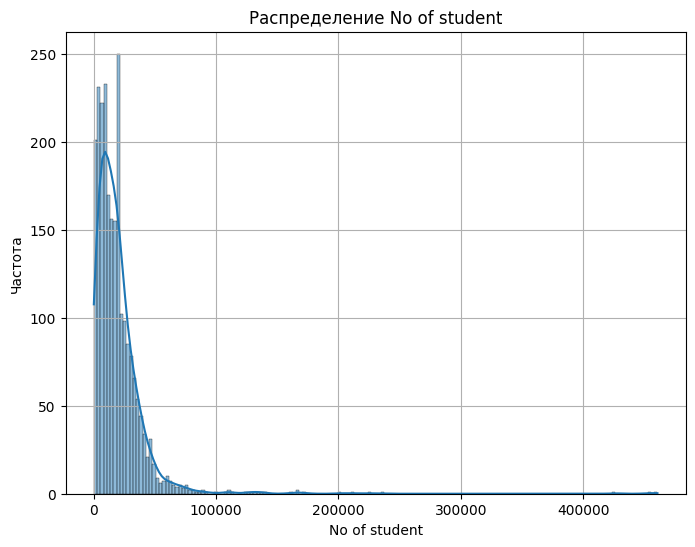

In [25]:
numeric_columns = ['No of student']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

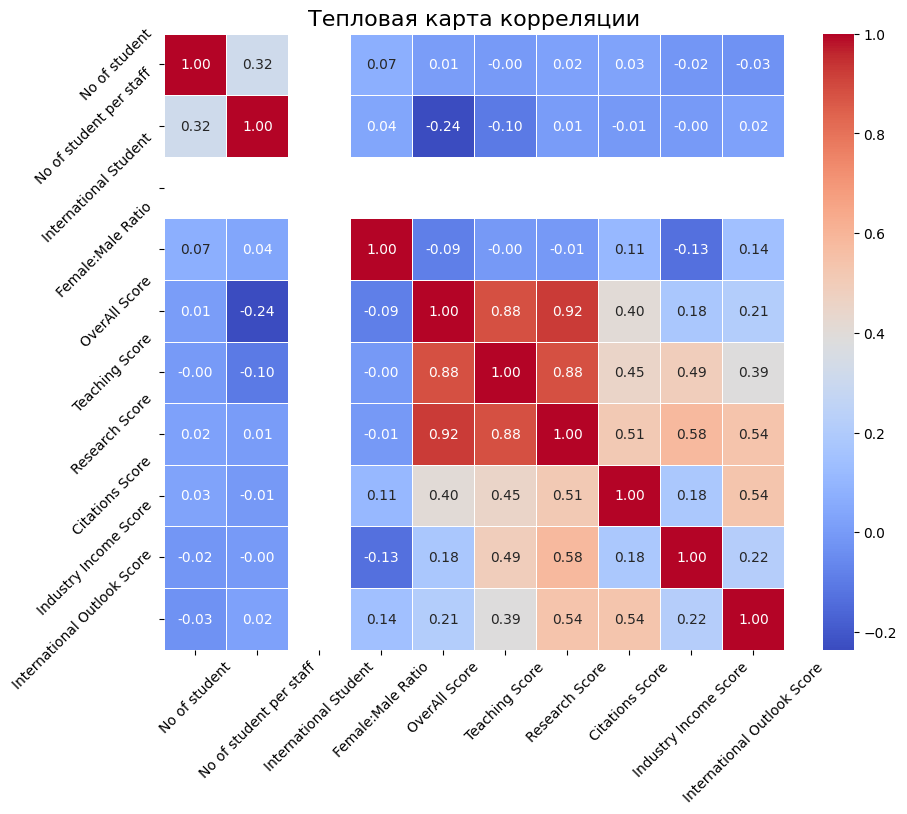

In [26]:
numeric_columns = ['No of student', 'No of student per staff', 'International Student', 
                   'Female:Male Ratio', 'OverAll Score', 'Teaching Score', 'Research Score', 
                   'Citations Score', 'Industry Income Score', 'International Outlook Score']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Тепловая карта корреляции', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


1. Количество студентов и общий балл (0,01):
Количество студентов не оказывает существенного влияния на общий балл, что указывает на то, что качество напрямую не связано с численностью студентов.

2. Международный рейтинг перспектив и исследовательский балл (0,54):
Умеренная положительная корреляция предполагает, что глобально ориентированные университеты с большей вероятностью преуспеют в исследованиях.

3. Поскольку баллы за преподавание и научные исследования наиболее положительно коррелируют с общим баллом, университетам следует уделять первоочередное внимание улучшению этих областей для повышения своей общей производительности.

4. Оптимизация соотношения студентов и сотрудников:
Отрицательная корреляция между количеством студентов на одного сотрудника и общим баллом подчеркивает важность поддержания управляемых размеров классов и предоставления адекватной поддержки преподавательскому составу. (Да даже у нас в КБТУ на одного преподователя много студентов, что вызывает недопонимания между ними (офис часы, какие то вопросы в коридоре и тд))

5. Количество студентов не равно качеству:
 Количество студентов не оказывает существенного влияния на общий балл, что позволяет предположить, что более мелкие учебные заведения все еще могут конкурировать с более крупными, если они преуспевают в преподавании, исследованиях и глобальном мировоззрении. (Один в поле войн, университет с 10 умными студентами намного выше по рейтингу, чем другие 1000 не устойчивых умных :) )

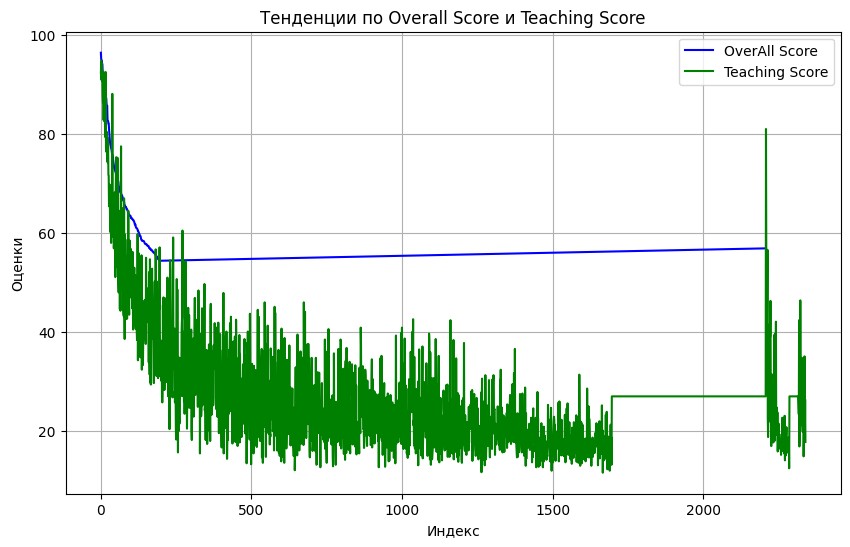

In [27]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=data, x=data.index, y='OverAll Score', label='OverAll Score', color='blue')
sns.lineplot(data=data, x=data.index, y='Teaching Score', label='Teaching Score', color='green')

plt.title('Тенденции по Overall Score и Teaching Score')
plt.xlabel('Индекс')
plt.ylabel('Оценки')
plt.legend()
plt.grid(True)
plt.show()

1. Изменчивость баллов за преподавание указывает на то, что некоторые университеты преуспевают в преподавании, в то время как другие могут сосредоточиться на исследованиях, цитированиях или других показателях, влияющих на общий балл.

2. Преподавание не доминирует над общим баллом:
Плавная тенденция общего балла относительно колеблющегося балла за преподавание предполагает, что другие факторы (например, исследования, цитирования, международные перспективы) вносят значительный вклад в общий балл.

<Figure size 1600x800 with 0 Axes>

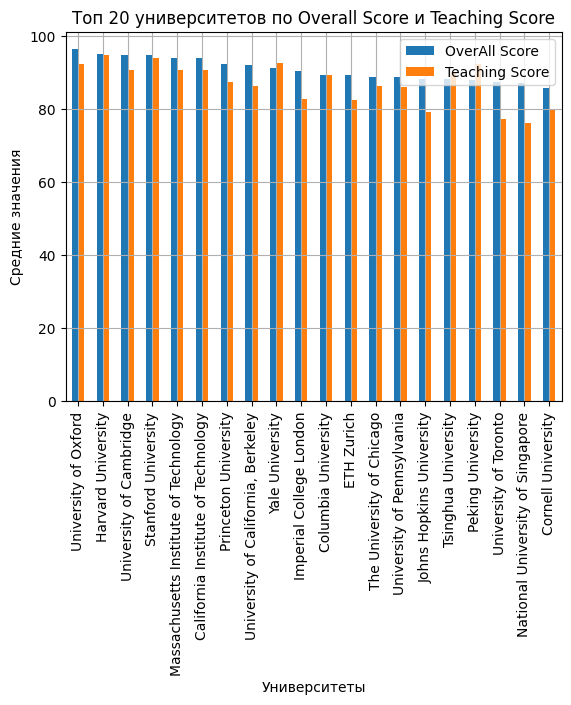

In [28]:
university_group = data.groupby('Name of University')[['OverAll Score', 'Teaching Score', 'Research Score']].mean()

plt.figure(figsize=(16, 8))
university_group.sort_values(by='OverAll Score', ascending=False).head(20)[['OverAll Score', 'Teaching Score']].plot(kind='bar')

plt.title('Топ 20 университетов по Overall Score и Teaching Score')
plt.xlabel('Университеты')
plt.ylabel('Средние значения')
plt.xticks(rotation=90)
plt.legend(["OverAll Score", "Teaching Score"])
plt.grid(True)
plt.show()



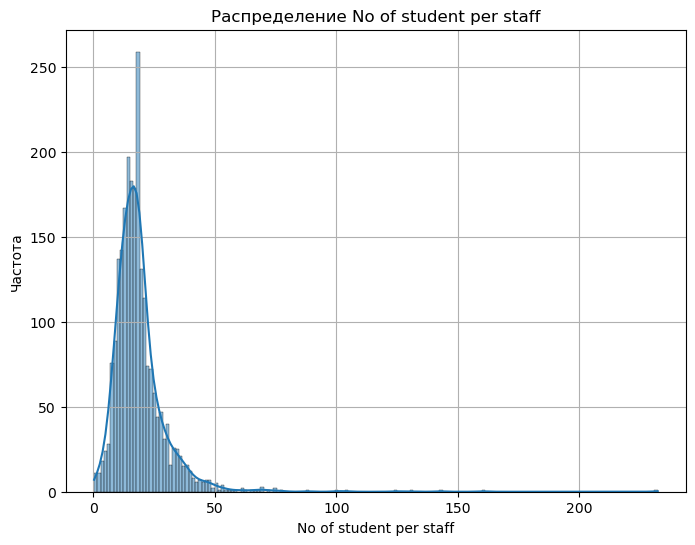

In [378]:
numeric_columns = ['No of student per staff']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

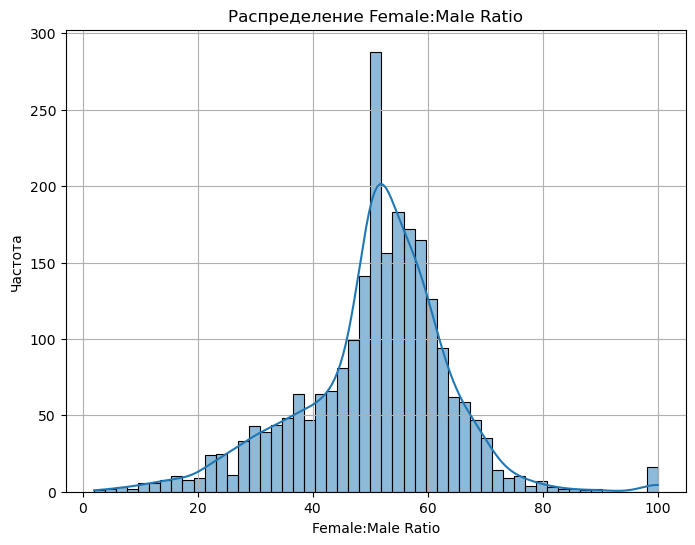

In [384]:
numeric_columns = ['Female:Male Ratio']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

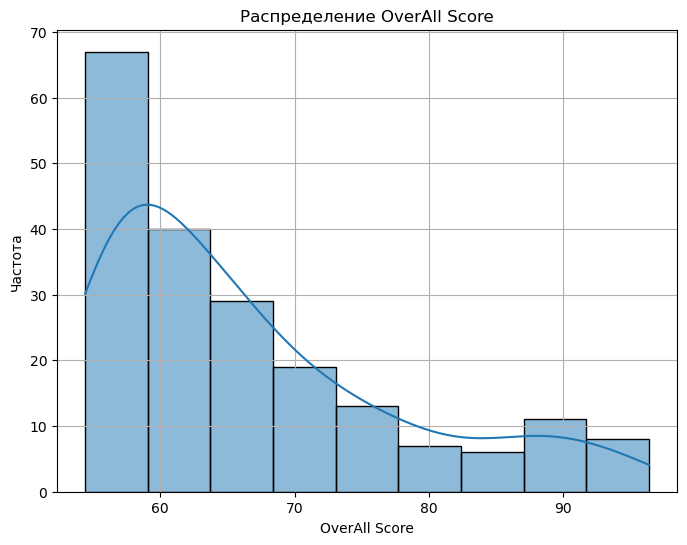

In [386]:
numeric_columns = ['OverAll Score']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

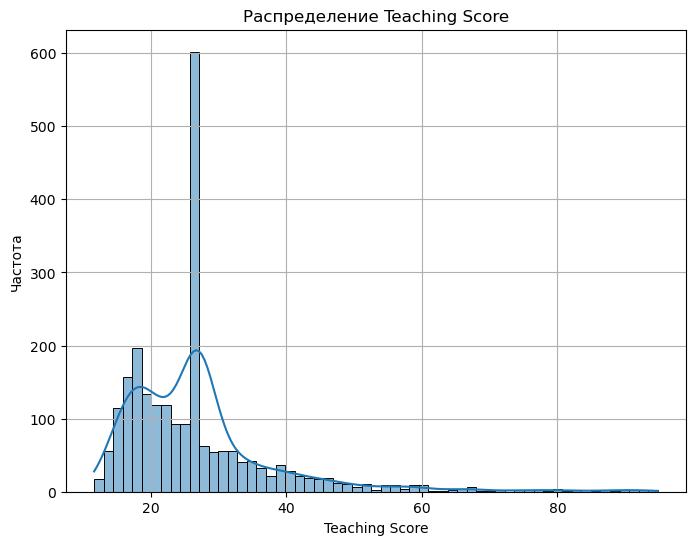

In [390]:
numeric_columns = ['Teaching Score']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

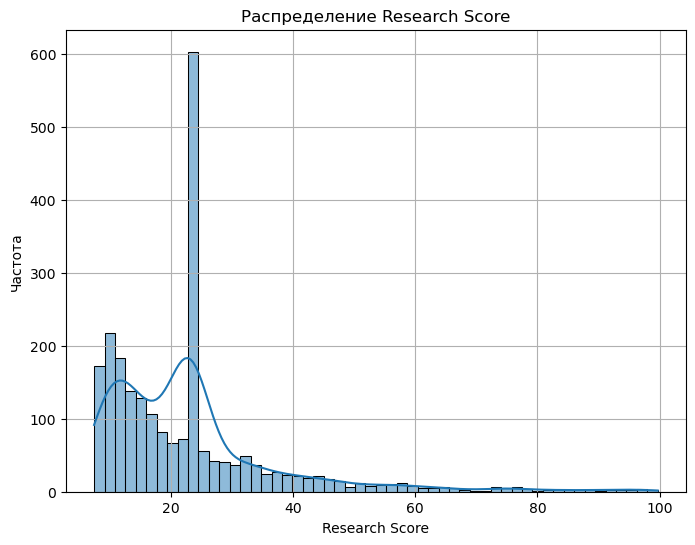

In [392]:
numeric_columns = ['Research Score']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

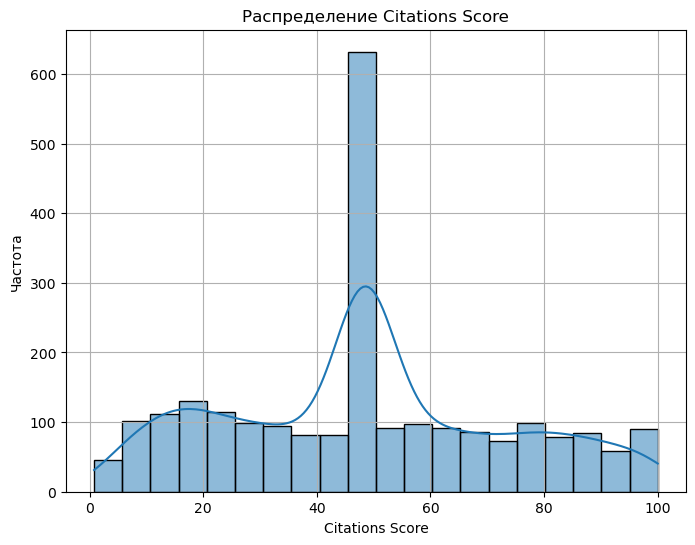

In [394]:
numeric_columns = ['Citations Score']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

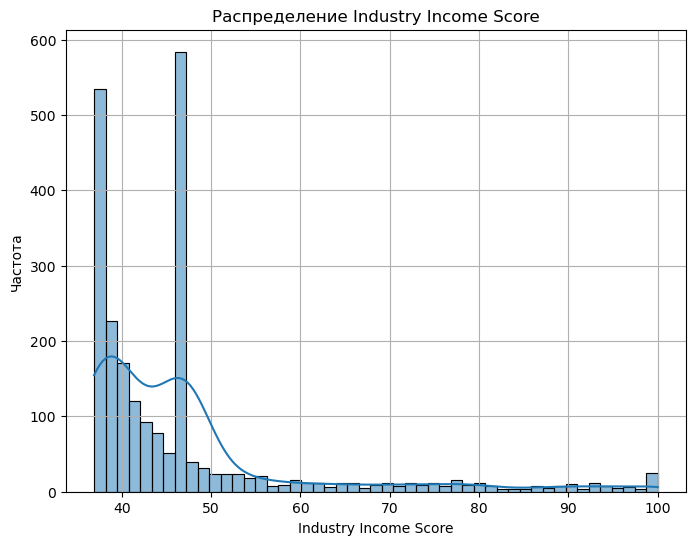

In [398]:
numeric_columns = ['Industry Income Score']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

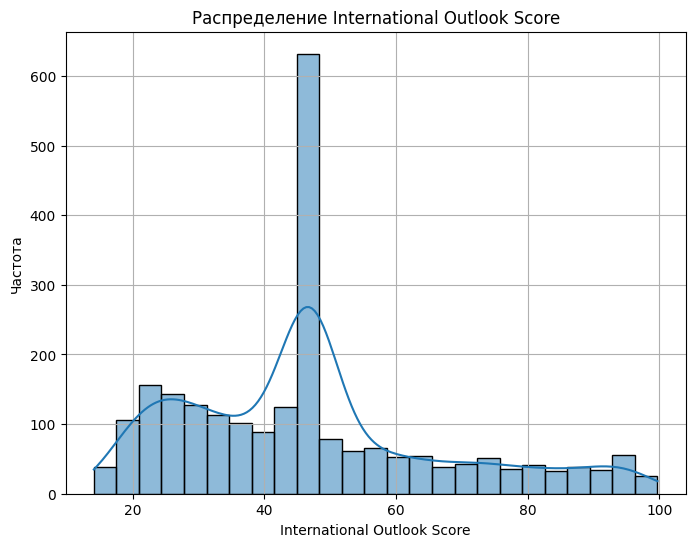

In [17]:
numeric_columns = ['International Outlook Score']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)  # kde=True добавляет график плотности
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

/var/folders/7p/4qp5v50s377f3k7xy_skq2s80000gp/T/ipykernel_67252/3089631298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['No of student'] = pd.to_numeric(cleaned['No of student'], errors='coerce')


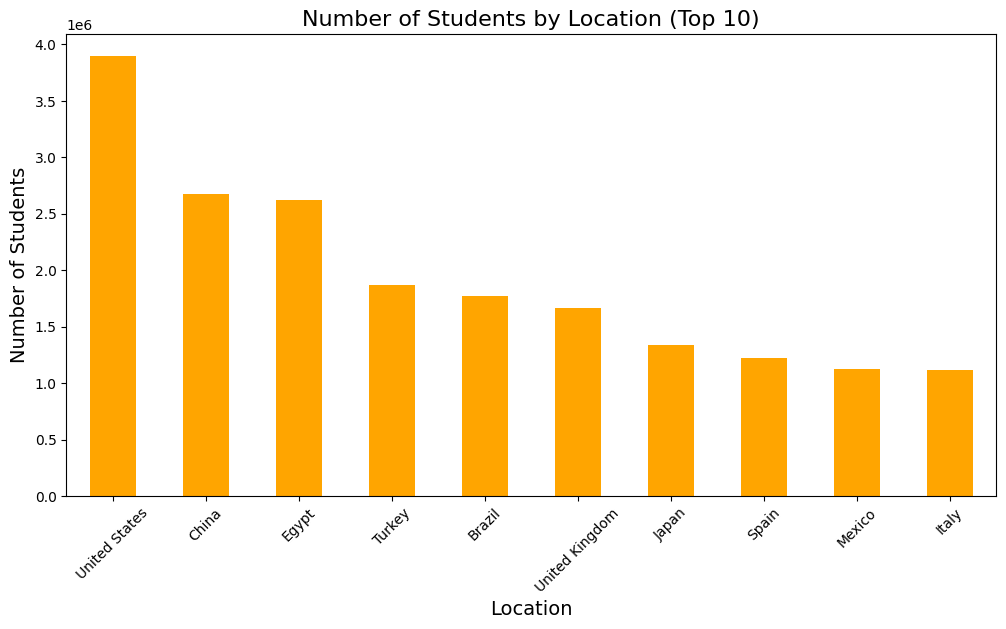

In [42]:
# Number of Students by Location
cleaned['No of student'] = pd.to_numeric(cleaned['No of student'], errors='coerce')
filtered_cleaned = cleaned[cleaned['Location'].str.lower() != 'unknown']
students_by_location = filtered_cleaned.groupby('Location')['No of student'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
students_by_location.plot(kind='bar', color='orange')
plt.title('Number of Students by Location (Top 10)', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.xticks(rotation=45)
plt.show()

1. Доминирование США и Китая ожидаемо, учитывая их большое население и хорошо налаженные системы высшего образования. Однако присутствие Египта в первой тройке подчеркивает его значительное количество студентов относительно его размера и стадии развития.

2. Странам среднего уровня (например, Турции, Бразилии, Великобритании) может потребоваться расширение своих систем высшего образования, если они хотят конкурировать с ведущими странами, такими как США и Китай, в сфере глобального образования и научных исследований. 

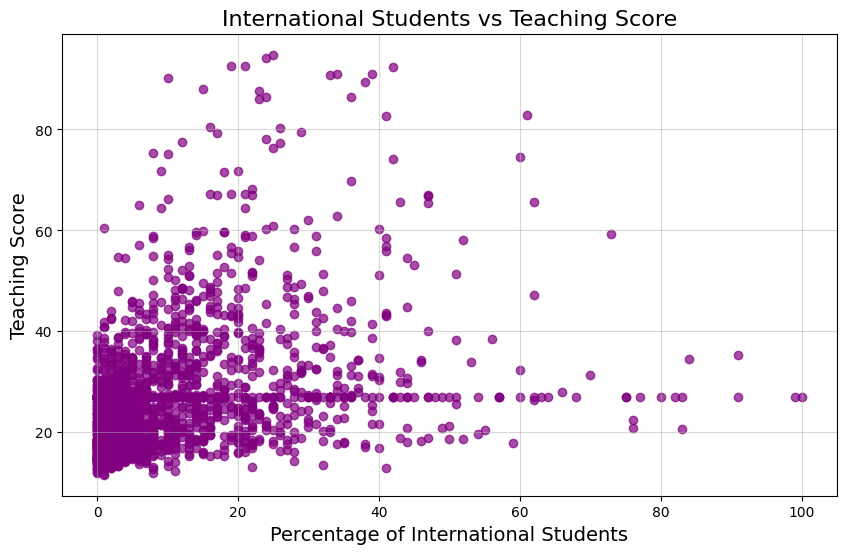

In [22]:
# Scatter plot to see if there's a relationship between the percentage of international students and the teaching score.

plot_data = cleaned.copy()

plot_data['International Student'] = (
    plot_data['International Student']
    .str.rstrip('%')          
    .replace('', np.nan)      
    .astype(float)           
)

plt.figure(figsize=(10, 6))
plt.scatter(plot_data['International Student'], plot_data['Teaching Score'], alpha=0.7, color='purple')
plt.title('International Students vs Teaching Score', fontsize=16)
plt.xlabel('Percentage of International Students', fontsize=14)
plt.ylabel('Teaching Score', fontsize=14)
plt.grid(alpha=0.5)
plt.show()

1. Значительное количество университетов имеют низкий процент иностранных студентов. Это говорит о том, что большинство университетов ориентируются в первую очередь на отечественных студентов.

2. Университеты с более низким процентом иностранных студентов демонстрируют широкий диапазон оценок преподавания: от низких до высоких. Это указывает на то, что более высокая доля местных студентов не обязательно коррелирует с низкими или высокими оценками преподавания.

3. Немногие университеты имеют высокий процент иностранных студентов. Среди них оценки преподавания в основном ниже 60, что указывает на то, что такие университеты могут столкнуться с трудностями в достижении более высоких оценок преподавания.